# 2.2 Linear Regression: Feed
    - placeholder를 입력으로 사용하여 간간한 linear regression 구현
    - session 실행 시 place holder에 변수를 대입한다.
    - 이때 사용되는 것이 feed_dict
    

0 50.38722 [0.7113135] [-0.25783545]
200 7.824431e-05 [2.0026217] [-0.01643898]
400 8.121902e-06 [2.0008447] [-0.00529633]
600 8.4312035e-07 [2.0002723] [-0.00170648]
800 8.763307e-08 [2.0000877] [-0.00055002]
1000 9.067127e-09 [2.0000281] [-0.00017704]
1200 9.484139e-10 [2.000009] [-5.7215857e-05]
1400 1.0687627e-10 [2.000003] [-1.9128353e-05]
1600 1.4910323e-11 [2.0000012] [-7.096916e-06]
1800 3.4381096e-12 [2.0000007] [-3.212805e-06]
2000 3.0481312e-12 [2.0000007] [-2.987214e-06]


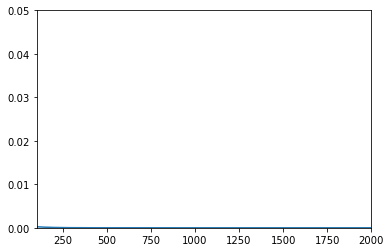

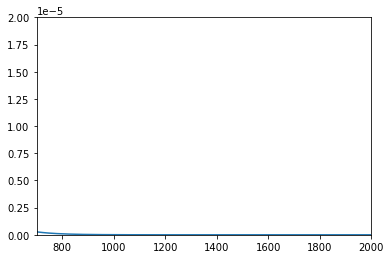

In [28]:
# Lab 2-2 Linear Regression feed
# feed dict를 사용하여 값을 전달한다.
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(000)

# Try to find value for W and b to compute y_data=X_data*W+b
# We know thar W shoulb be 1 ans b 0
# But let's Tensorflow figure it out
x_data=[i for i in range(10)]
y_data=[i for i in range(0,20,2)]
W=tf.Variable(tf.random_normal([1]),name='wright')
b=tf.Variable(tf.random_normal([1]),name='bias')
cost_=[]
Weight=[]
bias=[]
### Now we can use X ans Y in place of x_data and y_data
### placeholders for a tensor that will be alawys fed using feed_dict
### See http://stackoverflow.com/questons/36693740/
X=tf.placeholder(tf.float32,shape=[None])
Y=tf.placeholder(tf.float32,shape=[None])

# Out hypothesis WZ+b
hypothesis=X*W+b

# cost function
cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

# Launch the graph
sess=tf.Session()

# initialize variables by using global variables inirializer()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val,W_val,b_val,_=sess.run([cost,W,b,train],feed_dict={X:x_data,Y:y_data})
    cost_.append(cost_val)
    Weight.append(W_val)
    bias.append(b_val)
    if step%200==0:
        print(step,cost_val,W_val,b_val)

# Graphic display
x_len=len(cost_)
plt.plot(range(len(cost_)),cost_,label='cost')
plt.xlim(100,len(cost_))
plt.ylim(0,0.05)
plt.show()

plt.plot(range(len(cost_)),cost_,label='cost')
plt.xlim(700,len(cost_))
plt.ylim(0,0.00002)
plt.show()

